In [1]:
import sys 
import os

In [2]:
src_path = os.path.abspath("../")
if src_path not in sys.path:
    sys.path.append(src_path)

In [3]:
from src.tools.md_class_functions import *
from src.tools.md_class_utility import*
from src.tools.md_class_graphs import *
from src.water_md_class import *

### Set path to your lammps file and initialise trajectory object

In [4]:
water_path = "../testing/recombination_tester.lammpstrj"

In [5]:
trj = Trajectory(water_path, format="lammpstrj", scaled=0)

### Access class atributes of the Trajectory object 

In [6]:
    print("Trajectory first 3 rows")
    print(trj.trajectory[0, :3, :])
    print("box dimensions")
    print(trj.box_dim[0])
    print("box size")
    print(trj.box_size[0])
    print("number of atoms")
    print(trj.n_atoms)
    print("number of timesteps")
    print(trj.n_snapshots)
    print("species split")
    print("s1 = Hydrogen")
    print(trj.s1[0][:3, :])
    print("s2 = Oxygen")
    print(trj.s2[0][:3, :])
    print("did recombine?")
    print(trj.did_recombine)
    print("Recombination Time")
    print(trj.recombination_time)

Trajectory first 3 rows
[[1.43000000e+02 1.00000000e+00 8.03905819e-01 4.65804192e-02
  2.01737819e-01]
 [1.37000000e+02 1.00000000e+00 8.21091819e-01 1.29108819e-01
  1.63652819e-01]
 [6.20000000e+01 1.00000000e+00 8.71580819e-01 2.45479819e-01
  2.67572819e-01]]
box dimensions
[[-0.04968662 16.25073041]
 [-0.04968662 16.25073041]
 [-0.04968662 16.25073041]]
box size
[16.30041703 16.30041703 16.30041703]
number of atoms
384
number of timesteps
1501
species split
s1 = Hydrogen
[[1.43000000e+02 1.00000000e+00 8.03905819e-01 4.65804192e-02
  2.01737819e-01]
 [1.37000000e+02 1.00000000e+00 8.21091819e-01 1.29108819e-01
  1.63652819e-01]
 [6.20000000e+01 1.00000000e+00 8.71580819e-01 2.45479819e-01
  2.67572819e-01]]
s2 = Oxygen
[[3.59000000e+02 2.00000000e+00 2.29213819e-01 4.36805819e-01
  8.62509192e-02]
 [3.22000000e+02 2.00000000e+00 6.47391819e-01 2.38568819e-01
  2.68210192e-02]
 [3.05000000e+02 2.00000000e+00 4.56863819e-01 1.21592819e-01
  4.57607819e-01]]
did recombine?
True
Reco

### Class Methods


In [7]:
trj.get_ion_distance()

array([[0.00000000e+00, 4.15562819e-01, 2.14361819e-01, ...,
        2.81206819e-01, 5.12356819e-01, 3.84737031e-01],
       [1.00000000e+00, 4.18365674e-01, 2.15973674e-01, ...,
        2.78163674e-01, 5.11357674e-01, 3.87250464e-01],
       [2.00000000e+00, 4.23268966e-01, 2.22704966e-01, ...,
        4.67599966e-01, 8.98261966e-01, 5.86682386e-01],
       ...,
       [1.49800000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.49900000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.50000000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

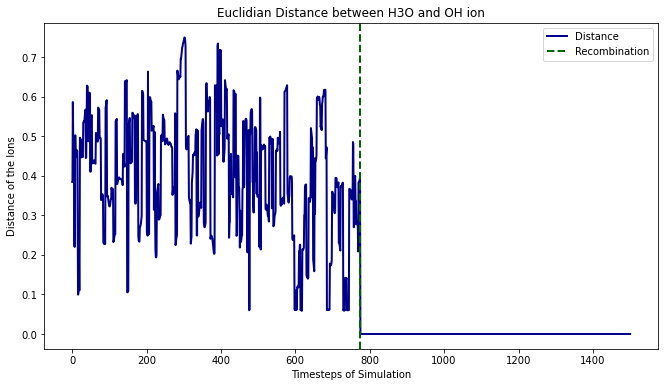

In [8]:
plot_ion_distance_euc(trj, (11, 6))

In [9]:
time_step = 773

In [10]:
bonding_list, unique_oxygens, ions = trj.get_hydrogen_bonds(timestep=time_step, cutoff=2.9, starting_oh=True)

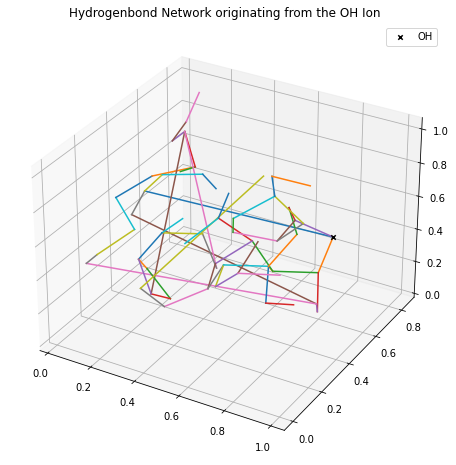

In [11]:
plot_hbonds_single(bonding_list, trj.s2[time_step], start="OH", fig_size=(10, 8))

In [30]:
bonds_H3O, oxygens_H3O, ions =  trj.get_hydrogen_bonds(timestep=time_step, cutoff=2.9, starting_oh=False)
bonds_OH, oxygens_OH, _ =  trj.get_hydrogen_bonds(timestep=time_step, cutoff=2.9, starting_oh=True)

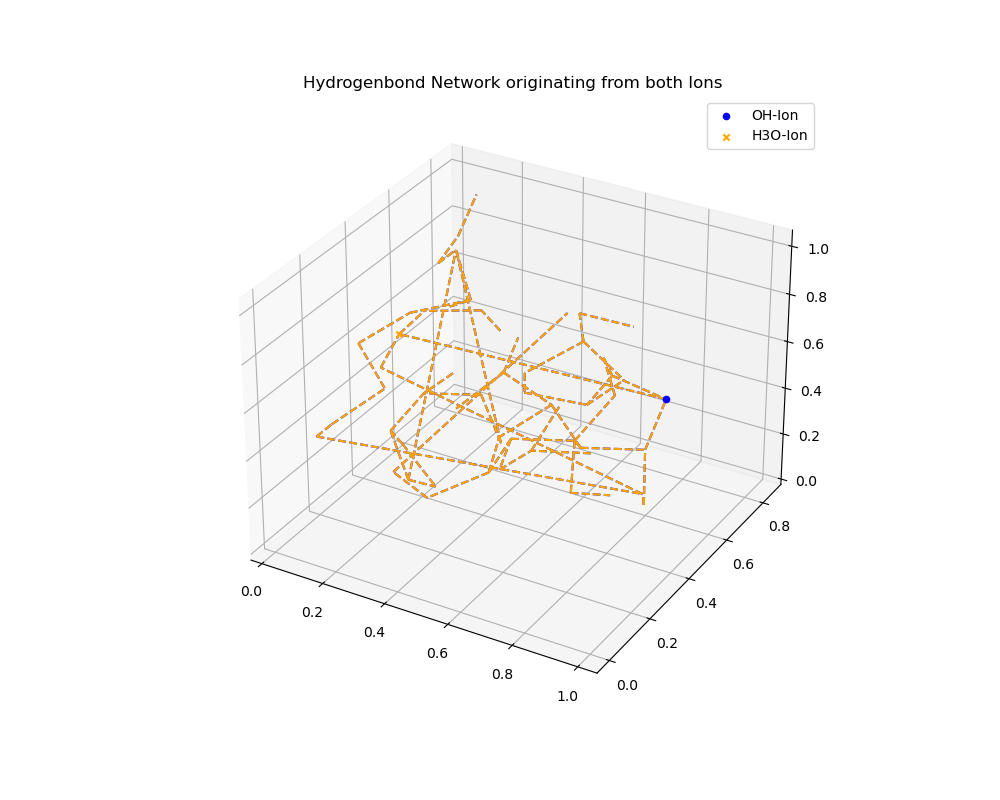

In [31]:
plot_hbond_network(bonds_OH, bonds_H3O, trj.s2[time_step], ions, fig_size=(10, 8))

In [14]:
hb_timeseries = get_HB_timeseries(trj)

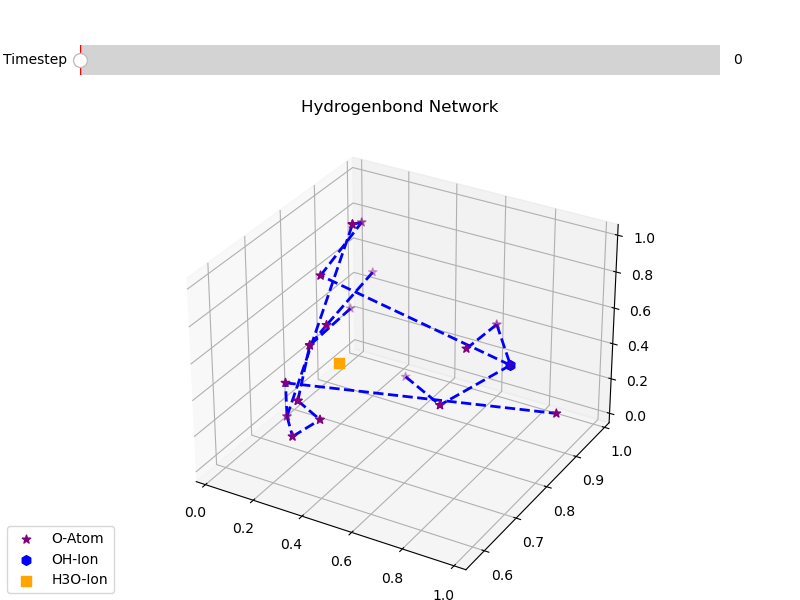

In [22]:
plot_HB_network(hb_timeseries, trj.s2, plot_oxygen=True)

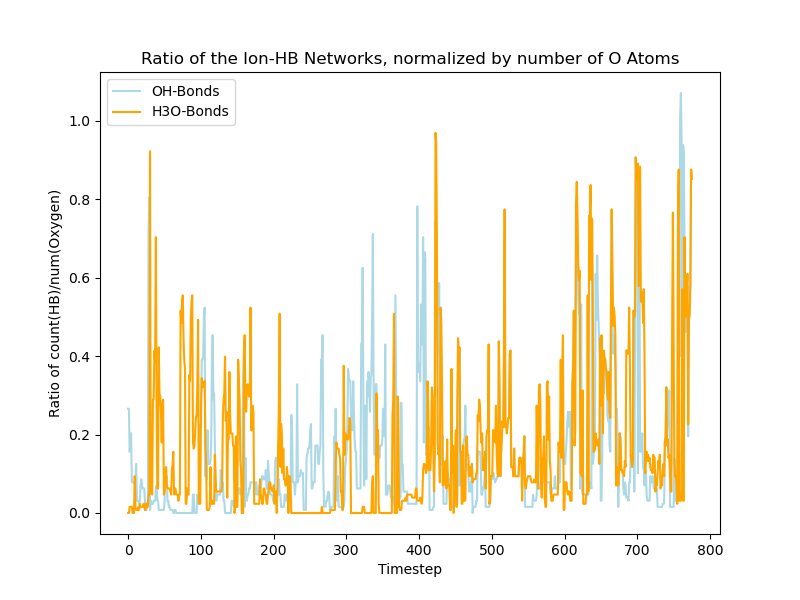

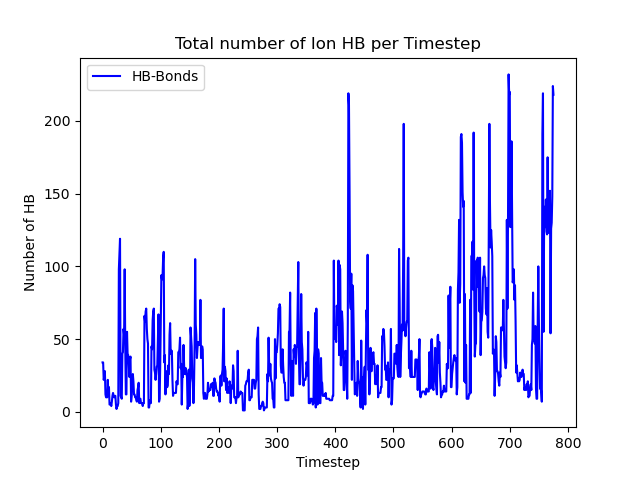

In [32]:
plot_HB_ratio(hb_timeseries, n_atoms=trj.n_atoms)

In [17]:
wire_lengths, h_bonds = get_all_wires(trj)

In [18]:
%matplotlib widget

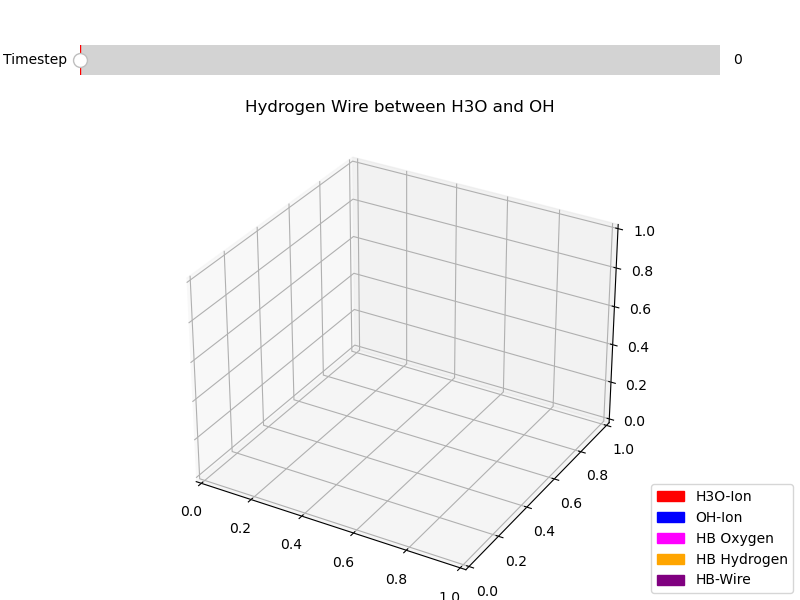

In [21]:
plot_HB_wire(h_bonds, trj, plot_hydrogens=True)

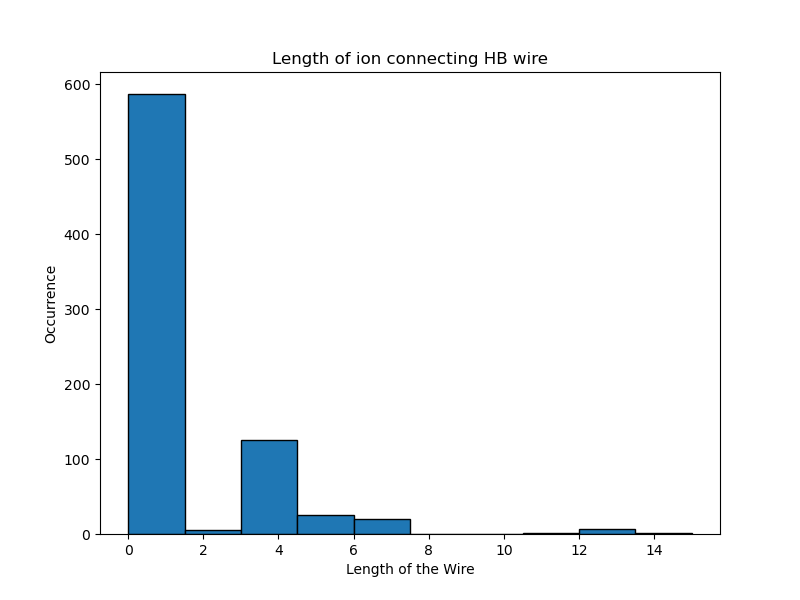

In [20]:
plot_wire_length(wire_lengths)

In [23]:
OO_rdf = trj.get_rdf_rdist()

In [28]:
HH_rdf = trj.get_rdf_rdist(gr_type="HH")

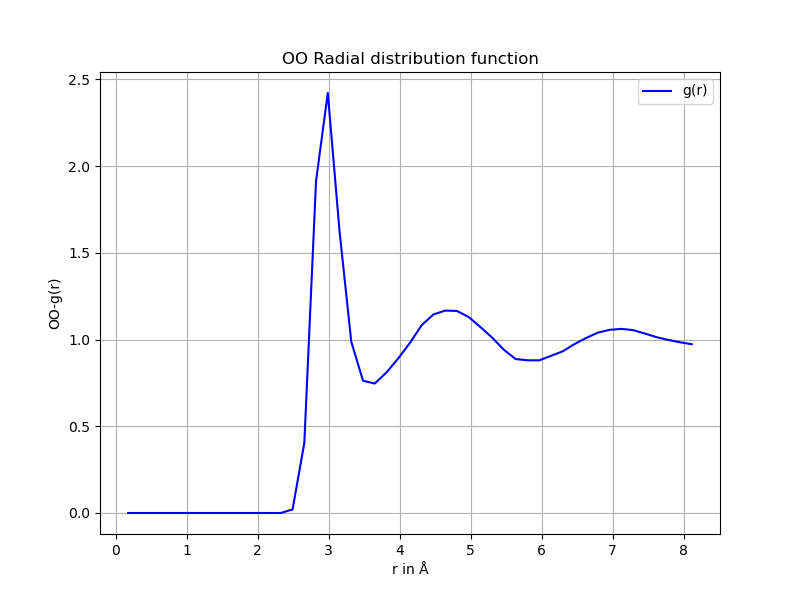

In [25]:
plot_rdf(OO_rdf[0], OO_rdf[1])

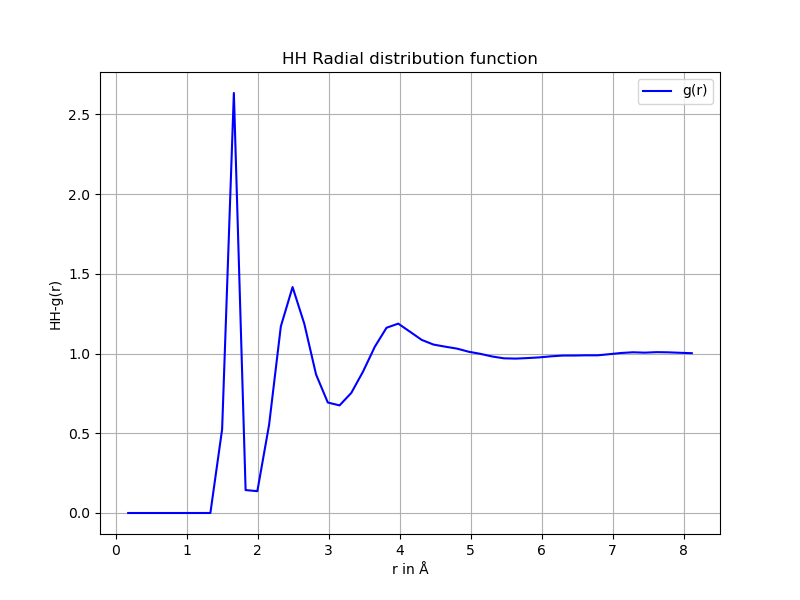

In [29]:
plot_rdf(HH_rdf[0], HH_rdf[1], type="HH")

In [26]:
MSD = trj.get_MSD()

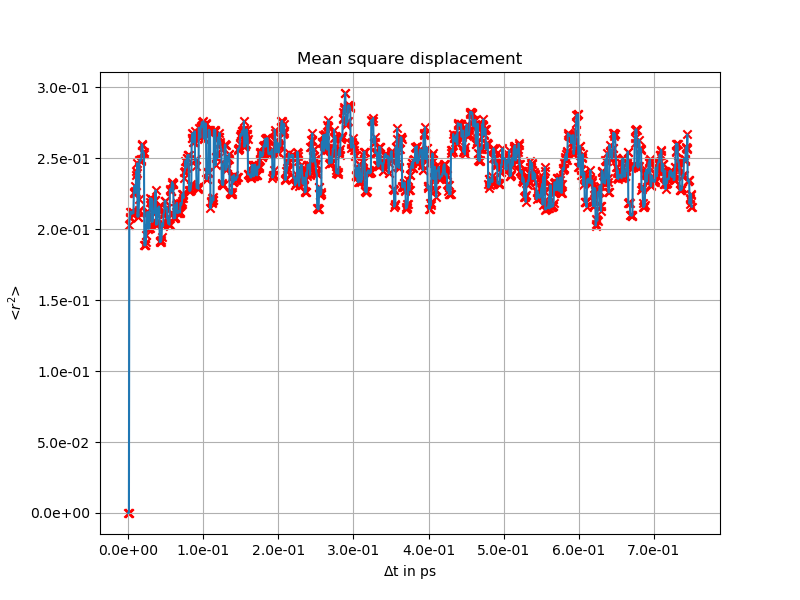

In [27]:
plot_MSD(MSD)

In [34]:
trj.get_rotational_diffusion()

IndexError: index 1 is out of bounds for axis 0 with size 1